In [2]:
import sys, importlib
sys.path.append('/Users/elliottunstall/Desktop/Imperial/FYP/codebase/utils')
print(sys.path)
from registration_toolkit import registration_success_measure, register_collection
importlib.reload(sys.modules['registration_toolkit'])
from registration_toolkit import registration_success_measure, register_collection
import matplotlib.pyplot as plt
import numpy as np
import cv2

type_of_transform = 'SyN'
syn_metric = ['mattes', 'CC', 'meansquares', 'demons']
success_measures = ["abs_diff", "mse", "ssim"]

['/Users/elliottunstall/Desktop/Imperial/FYP/codebase/visualisation', '/Users/elliottunstall/opt/anaconda3/lib/python39.zip', '/Users/elliottunstall/opt/anaconda3/lib/python3.9', '/Users/elliottunstall/opt/anaconda3/lib/python3.9/lib-dynload', '', '/Users/elliottunstall/Desktop/Imperial/FYP/codebase/venv/lib/python3.9/site-packages', 'utils', '/Users/elliottunstall/Desktop/Imperial/FYP/codebase/utils']


In [3]:
## Load Video

path = '/Users/elliottunstall/Desktop/Imperial/Year 4/Masters Project/Clinical BMode heart acquisitions/12_Clinical_20230421_114731_VERASONICS_HFR016_BMode_IM_0197.avi' # change path 
cap = cv2.VideoCapture(path)

data = np.zeros([600,800,3,36])
i = 0
while cap.isOpened():
    ret, frame = cap.read()  
    if ret:
        data[:,:,:,i] = frame
        i += 1
    else:
        break

    # Break the loop if the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):

            # Release the video capture object and close all windows
        cap.release()
        cv2.destroyAllWindows()
            
        break

In [4]:
data = np.asarray(data)
registration_collection = {}

for metric in syn_metric:
    moving_collection, reg_images = register_collection(data, data[:,:,0,9], type_of_transform, metric)
    registration_collection[metric] = reg_images

In [5]:
success_collection = {}
for success_metric in success_measures:
    reg_metrics = []
    for key, value in registration_collection.items():
        metric_images, metric_values = registration_success_measure(value, data[:,:,0,9], success_metric=success_metric)
        reg_metrics.append(metric_values)
    success_collection[success_metric] = reg_metrics

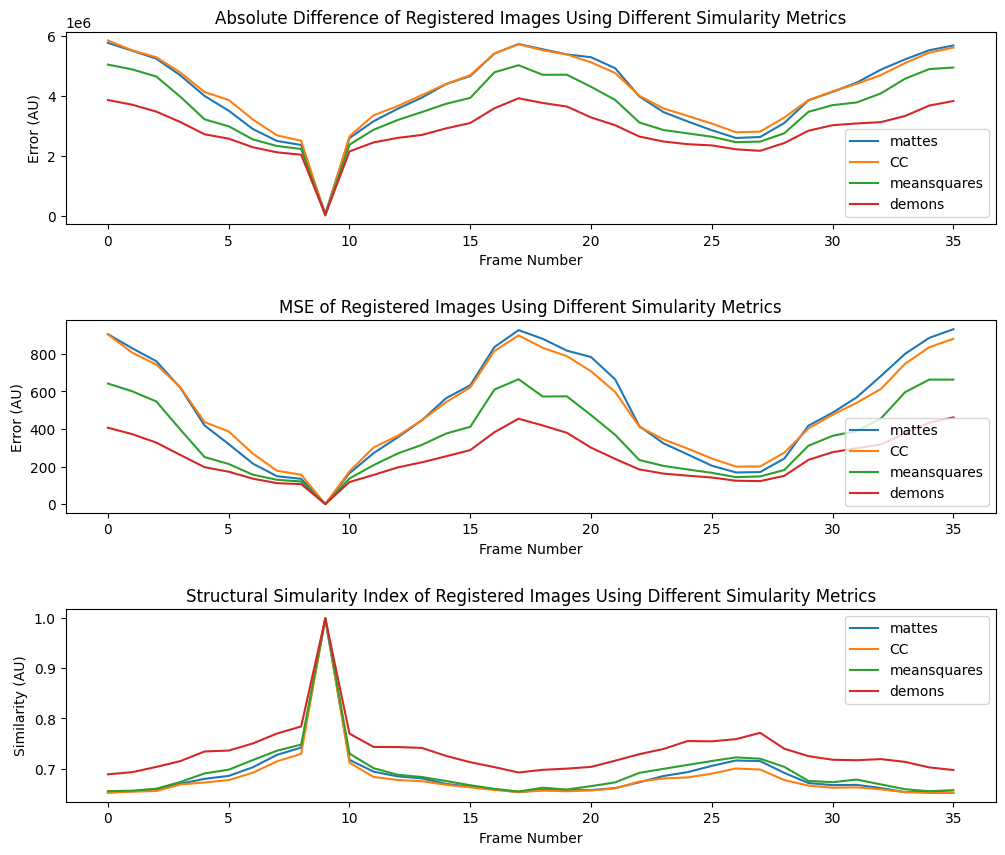

In [6]:
scoring_measure_names = ['Absolute Difference', 'MSE', 'Structural Simularity Index']
fig, axs = plt.subplots(3, 1, figsize=(12, 10))
plt.subplots_adjust(wspace=0.05, hspace=0.5)

for i, key in enumerate(success_collection):
    for index, metric in enumerate(syn_metric):
        
        axs[i].plot(success_collection[key][index], label=metric)

    axs[i].legend()
    axs[i].set_xlabel("Frame Number")
    if i < 2:
        axs[i].set_ylabel("Error (AU)")
    else:
        axs[i].set_ylabel("Similarity (AU)")
    axs[i].set_title(f"{scoring_measure_names[i]} of Registered Images Using Different Simularity Metrics")

plt.show()